# Notebook d'entrainement du modèle

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from torchvision.models import mobilenet_v3_small

## 1. Exploration des données

In [ ]:
# 1 ligne = 1 image (28*28 pixels = 784 pixels), 1 colonne = 1 pixel ; 

fashion_data = pd.read_csv('../data/fashion-mnist_train.csv')
print(f"{fashion_data .shape[0]:_} images dans le jeu d'entrainement")
fashion_data.head()

60_000 images dans le jeu d'entrainement


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# analyse de la cible : 10 labels parfaitement équilibrés 

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

fashion_data['label'].value_counts(normalize=True)

label
2    0.1
9    0.1
6    0.1
0    0.1
3    0.1
4    0.1
5    0.1
8    0.1
7    0.1
1    0.1
Name: proportion, dtype: float64

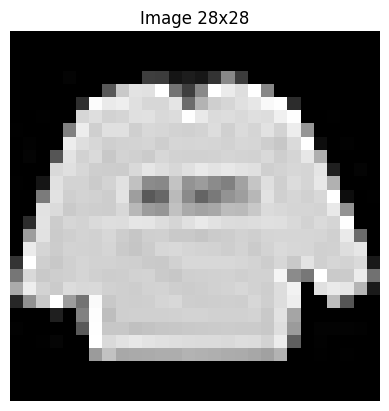

In [35]:
# Affichage d'une image 

image_flat = fashion_data.drop(columns=['label']).loc[0].to_numpy()
image = image_flat.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title("Image 28x28")
plt.axis('off')
plt.show()

## 2. Préparation des données

In [37]:
X = fashion_data.drop(columns=['label'])
y = fashion_data['label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(f'Taille du jeu de train {X_train.shape[0]:_}, taille jeu de test : {X_test.shape[0]:_}')

Taille du jeu de train 48_000, taille jeu de test : 12_000


In [ ]:
# Transformations (Fashion MNIST 28x28 → MobileNetV3 attend 224x224 RGB)
transform = transforms.Compose([
    transforms.Resize((224, 224)),# resize images 28x28 → 224x224
    transforms.Grayscale(num_output_channels=3),  # convertir 1 canal → 3 canaux RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # normalisation ImageNet
                         std=[0.229, 0.224, 0.225]),
])

## 3. Chargement du modèle de Deep Learning

Modèle choisi : MobileNetV3 small 

- très léger 
- rapide à entrainer (entrainement sur CPU)
- suffisamment puissant pour Fashion MNIST

In [ ]:


model = mobilenet_v3_small(num_classes=10)

